In [2]:
from sklearn.ensemble import RandomForestClassifier  
# or
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
# or
from sklearn.metrics import mean_squared_error
import pandas as pd


In [3]:
data=pd.read_json("NBA_player_data.json")

In [4]:
position_mapping = {"PG": 1, "SG": 2, "SF": 3, "PF": 4, "C": 5}
features = ["AST", "TRB", "BLK", "STL", "TOV", "3PA","FTA"]

In [5]:
X=data[features]
y=data["Pos"].map(position_mapping)


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

In [8]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
y_pred = rf_classifier.predict(X_test)

In [10]:
# For classification tasks
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6046511627906976


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
scores = cross_val_predict(rf_classifier,X,y,cv=loocv)
accuracy = accuracy_score(y, scores)
print("Accuracy:", accuracy)

Accuracy: 0.5291375291375291


In [12]:
acc = {}
for i in range(10,1000,10):
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc[accuracy] = i

In [13]:
m = max(list(acc.keys()))
print("Max acc: ",m)
print("Best trees: ", acc[m])

Max acc:  0.6511627906976745
Best trees:  540


In [14]:
import matplotlib.pyplot as plt


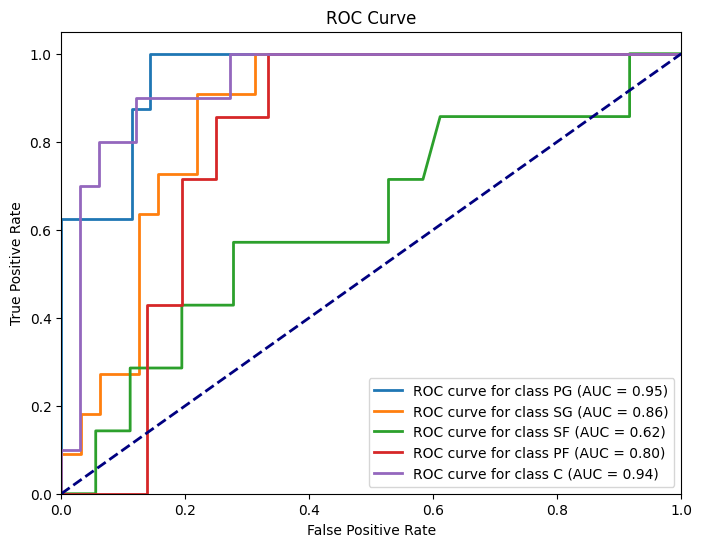

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import numpy as np
classes = ["PG","SG","SF","PF","C"]

y_probs = rf_classifier.predict_proba(X_test)

label_map = {i+1: class_label for i, class_label in enumerate(classes)}

plt.figure(figsize=(8, 6))
for i in range(1, len(classes) + 1):  
    class_label = label_map[i]
    fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (AUC = {:0.2f})'.format(class_label, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
y_pred_cv = cross_val_predict(rf_classifier, X, y, cv=10)  

conf_matrix_cv = confusion_matrix(y, y_pred_cv)

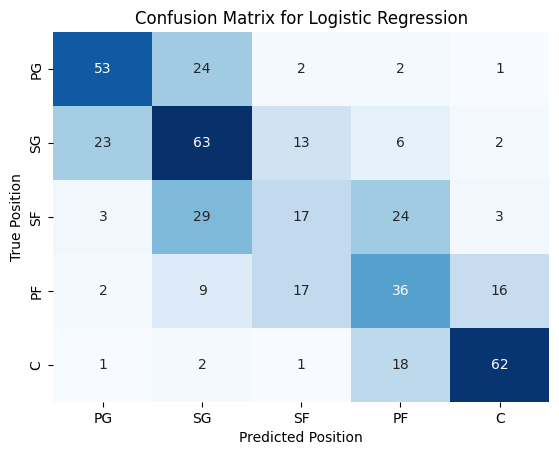

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=position_mapping.keys(),yticklabels=position_mapping.keys())
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error


y_pred = rf_classifier.predict(X_test)


mse = mean_squared_error(y_pred, y_test)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.46511627906976744
